In [23]:
import pandas as pd

# Replace with the raw URL of your CSV file on GitHub
github_csv_url = 'https://raw.githubusercontent.com/RohitDatta06/FPLpredict/refs/heads/main/merged_gw%20-%20merged_gw.csv.csv?token=GHSAT0AAAAAADKDRJVOL2ZLSYPNZVXXUZDG2H6YOVA'

try:
  df = pd.read_csv("merged_gw - merged_gw.csv.csv")
  #df = pd.read_csv(github_csv_url)
  print("CSV file loaded successfully into a pandas DataFrame.")
  display(df.head()) # Display the first few rows of the DataFrame
except Exception as e:
  print(f"Error loading CSV from URL: {e}")

CSV file loaded successfully into a pandas DataFrame.


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,playerteamposition,opponentposition,difficulty
0,Femi Seriki,DEF,Sheffield Utd,0.5,0,0,0,0,0.0,653,...,0,0,0,40,True,0,1,PROMOTED,11,2
1,Jack Hinshelwood,MID,Brighton,1.5,0,0,0,0,0.0,621,...,0,0,0,45,True,0,1,6,PROMOTED,1
2,Jadon Sancho,MID,Man Utd,3.0,0,0,4,0,11.3,397,...,0,0,0,70,True,0,1,3,13,2
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.1,0,0,0,0,0.0,487,...,0,0,0,40,True,0,1,PROMOTED,11,2
4,Vitaly Janelt,MID,Brentford,2.1,0,0,6,0,11.5,105,...,0,0,0,55,True,0,1,9,8,2


In [24]:
import numpy as np

# Define the columns to keep for each position, including the requested columns
shared_cols = ['name', 'position', 'element', 'GW', 'fixture', 'oppoine',
               'opponentposition', 'was_home', 'difficulty', 'minutes', 'starts',
               'goals_scored', 'assists', 'expected_goals', 'expected_assists',
               'expected_goal_involvements', 'threat', 'influence', 'creativity',
               'ict_index', 'own_goals', 'yellow_cards', 'red_cards', 'bonus',
               'bps', 'total_points', 'value', 'selected', 'transfers_in',
               'transfers_out', 'transfers_balance', 'xP', 'team_a_score',
               'team_h_score', 'playerteamposition']

forwards_cols = shared_cols + ['penalties_missed']

midfielders_cols = shared_cols + ['clean_sheets', 'expected_goals_conceded', 'goals_conceded']

defenders_cols = shared_cols + ['clean_sheets', 'expected_goals_conceded', 'goals_conceded']

goalkeepers_cols = shared_cols + ['clean_sheets', 'goals_conceded', 'expected_goals_conceded', 'saves', 'penalties_saved']


# Select the specified columns for each DataFrame
forwards_df = df[forwards_cols].copy()
midfielders_df = df[midfielders_cols].copy()
defenders_df = df[defenders_cols].copy()
goalkeepers_df = df[goalkeepers_cols].copy()

# Swap difficulty values 1 and 3 and convert boolean to int
for df_pos in [forwards_df, midfielders_df, defenders_df, goalkeepers_df]:
    df_pos['difficulty'] = df_pos['difficulty'].replace({1: 3, 3: 1})
    for col in df_pos.columns:
        if df_pos[col].dtype == 'bool':
            df_pos[col] = df_pos[col].astype(int)
    # Replace 'PROMOTED' with a random number (18, 19, or 20) in 'playerteamposition'
    promoted_indices_player = df_pos[df_pos['playerteamposition'] == 'PROMOTED'].index
    df_pos.loc[promoted_indices_player, 'playerteamposition'] = np.random.choice([18, 19, 20], size=len(promoted_indices_player))
    # Replace 'PROMOTED' with a random number (18, 19, or 20) in 'opponentposition'
    promoted_indices_opponent = df_pos[df_pos['opponentposition'] == 'PROMOTED'].index
    df_pos.loc[promoted_indices_opponent, 'opponentposition'] = np.random.choice([18, 19, 20], size=len(promoted_indices_opponent))
    # Convert 'playerteamposition' and 'opponentposition' to numeric, coercing errors
    df_pos['playerteamposition'] = pd.to_numeric(df_pos['playerteamposition'], errors='coerce')
    df_pos['opponentposition'] = pd.to_numeric(df_pos['opponentposition'], errors='coerce')


print("Updated DataFrames with relevant columns and swapped difficulty values:")
print("\nForwards DataFrame:")
display(forwards_df.head())

print("\nMidfielders DataFrame:")
display(midfielders_df.head())

print("\nDefenders DataFrame:")
display(defenders_df.head())

print("\nGoalkeepers DataFrame:")
display(goalkeepers_df.head())

Updated DataFrames with relevant columns and swapped difficulty values:

Forwards DataFrame:


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,value,selected,transfers_in,transfers_out,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,penalties_missed
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,40,0,0,0,0,0.5,1,0,18,0
1,Jack Hinshelwood,MID,621,1,4,12,18,1,3,0,...,45,822,0,0,0,1.5,1,4,6,0
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,70,83993,0,0,0,3.0,0,1,3,0
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,40,6456,0,0,0,0.1,1,0,18,0
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,55,6508,0,0,0,2.1,2,2,9,0



Midfielders DataFrame:


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,transfers_in,transfers_out,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,clean_sheets,expected_goals_conceded,goals_conceded
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0,0,0,0.5,1,0,20,0,0.00,0
1,Jack Hinshelwood,MID,621,1,4,12,19,1,3,0,...,0,0,0,1.5,1,4,6,0,0.00,0
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,0,0,0,3.0,0,1,3,0,1.08,0
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,0,0,0,0.1,1,0,19,0,0.00,0
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,0,0,0,2.1,2,2,9,0,1.26,2



Defenders DataFrame:


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,transfers_in,transfers_out,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,clean_sheets,expected_goals_conceded,goals_conceded
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0,0,0,0.5,1,0,20,0,0.00,0
1,Jack Hinshelwood,MID,621,1,4,12,19,1,3,0,...,0,0,0,1.5,1,4,6,0,0.00,0
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,0,0,0,3.0,0,1,3,0,1.08,0
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,0,0,0,0.1,1,0,18,0,0.00,0
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,0,0,0,2.1,2,2,9,0,1.26,2



Goalkeepers DataFrame:


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,clean_sheets,goals_conceded,expected_goals_conceded,saves,penalties_saved
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0,0.5,1,0,20,0,0,0.00,0,0
1,Jack Hinshelwood,MID,621,1,4,12,20,1,3,0,...,0,1.5,1,4,6,0,0,0.00,0,0
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,0,3.0,0,1,3,0,0,1.08,0,0
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,0,0.1,1,0,20,0,0,0.00,0,0
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,0,2.1,2,2,9,0,2,1.26,0,0


In [25]:
print("Forwards DataFrame columns:")
print(forwards_df.columns.tolist())

print("\nMidfielders DataFrame columns:")
print(midfielders_df.columns.tolist())

print("\nDefenders DataFrame columns:")
print(defenders_df.columns.tolist())

print("\nGoalkeepers DataFrame columns:")
print(goalkeepers_df.columns.tolist())

Forwards DataFrame columns:
['name', 'position', 'element', 'GW', 'fixture', 'oppoine', 'opponentposition', 'was_home', 'difficulty', 'minutes', 'starts', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'threat', 'influence', 'creativity', 'ict_index', 'own_goals', 'yellow_cards', 'red_cards', 'bonus', 'bps', 'total_points', 'value', 'selected', 'transfers_in', 'transfers_out', 'transfers_balance', 'xP', 'team_a_score', 'team_h_score', 'playerteamposition', 'penalties_missed']

Midfielders DataFrame columns:
['name', 'position', 'element', 'GW', 'fixture', 'oppoine', 'opponentposition', 'was_home', 'difficulty', 'minutes', 'starts', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'threat', 'influence', 'creativity', 'ict_index', 'own_goals', 'yellow_cards', 'red_cards', 'bonus', 'bps', 'total_points', 'value', 'selected', 'transfers_in', 'transfers_out', 'transfers_balance', 'xP', 'team_a_scor

In [26]:
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Define target variable
target = 'total_points'

# Define features (excluding target and specified columns)
# We'll create a base list and then add position-specific columns later
base_features = [col for col in forwards_df.columns if col not in ['name', 'position', 'team', 'element', target]]

# Define features for each position
forwards_features = [col for col in base_features if col in forwards_df.columns]
midfielders_features = [col for col in base_features if col in midfielders_df.columns]
defenders_features = [col for col in base_features if col in defenders_df.columns]
goalkeepers_features = [col for col in base_features if col in goalkeepers_df.columns]

# Update position-specific features to include unique columns
midfielders_features.extend(['clean_sheets', 'expected_goals_conceded', 'goals_conceded'])
defenders_features.extend(['clean_sheets', 'expected_goals_conceded', 'goals_conceded'])
goalkeepers_features.extend(['clean_sheets', 'goals_conceded', 'expected_goals_conceded', 'saves', 'penalties_saved'])


# Train and predict for each position
positions = {
    'Forwards': (forwards_df, forwards_features),
    'Midfielders': (midfielders_df, midfielders_features),
    'Defenders': (defenders_df, defenders_features),
    'Goalkeepers': (goalkeepers_df, goalkeepers_features)
}

trained_models = {}

for pos_name, (df_pos, features) in positions.items():
    print(f"\nTraining model for {pos_name}...")

    # Drop rows with NaN values in features or target
    df_pos_cleaned = df_pos.dropna(subset=features + [target])

    if df_pos_cleaned.empty:
        print(f"No data left for {pos_name} after dropping NaNs. Skipping training.")
        continue

    X = df_pos_cleaned[features]
    y = df_pos_cleaned[target]

    # Initialize LightGBM Regressor model
    lgbm = lgb.LGBMRegressor(random_state=42)

    # Train the model
    lgbm.fit(X, y)

    # Store the trained model
    trained_models[pos_name] = lgbm

    # Generate predictions on the cleaned data
    predictions = lgbm.predict(X)

    # Add predictions to the original DataFrame (this requires careful alignment)
    # We'll create a temporary series with predictions and align it by index
    predictions_series = pd.Series(predictions, index=df_pos_cleaned.index)
    df_pos[f'predicted_{target}'] = predictions_series

    print(f"Model training for {pos_name} completed.")
    print(f"First 5 predictions for {pos_name}:\n{df_pos[f'predicted_{target}'].head()}")

# Display updated DataFrames with predictions
print("\nDataFrames with predicted_total_points:")
display(forwards_df.head())
display(midfielders_df.head())
display(defenders_df.head())
display(goalkeepers_df.head())


Training model for Forwards...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2966
[LightGBM] [Info] Number of data points in the train set: 29725, number of used features: 31
[LightGBM] [Info] Start training from score 1.052010
Model training for Forwards completed.
First 5 predictions for Forwards:
0    0.002525
1    0.002189
2    1.039918
3    0.002525
4    1.867046
Name: predicted_total_points, dtype: float64

Training model for Midfielders...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data points in the train set: 29725, number of used

,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,selected,transfers_in,transfers_out,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,penalties_missed,predicted_total_points
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0,0,0,0,0.5,1,0,18,0,0.002525
1,Jack Hinshelwood,MID,621,1,4,12,18,1,3,0,...,822,0,0,0,1.5,1,4,6,0,0.002189
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,83993,0,0,0,3.0,0,1,3,0,1.039918
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,6456,0,0,0,0.1,1,0,18,0,0.002525
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,6508,0,0,0,2.1,2,2,9,0,1.867046


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,transfers_out,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,clean_sheets,expected_goals_conceded,goals_conceded,predicted_total_points
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0,0,0.5,1,0,20,0,0.00,0,0.001772
1,Jack Hinshelwood,MID,621,1,4,12,19,1,3,0,...,0,0,1.5,1,4,6,0,0.00,0,0.006789
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,0,0,3.0,0,1,3,0,1.08,0,0.996380
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,0,0,0.1,1,0,19,0,0.00,0,0.001772
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,0,0,2.1,2,2,9,0,1.26,2,2.003059


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,transfers_out,transfers_balance,xP,team_a_score,team_h_score,playerteamposition,clean_sheets,expected_goals_conceded,goals_conceded,predicted_total_points
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0,0,0.5,1,0,20,0,0.00,0,0.002072
1,Jack Hinshelwood,MID,621,1,4,12,19,1,3,0,...,0,0,1.5,1,4,6,0,0.00,0,0.007247
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,0,0,3.0,0,1,3,0,1.08,0,0.999036
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,0,0,0.1,1,0,18,0,0.00,0,0.002072
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,0,0,2.1,2,2,9,0,1.26,2,2.001582


,name,position,element,GW,fixture,oppoine,opponentposition,was_home,difficulty,minutes,...,xP,team_a_score,team_h_score,playerteamposition,clean_sheets,goals_conceded,expected_goals_conceded,saves,penalties_saved,predicted_total_points
0,Femi Seriki,DEF,653,1,7,8,11,1,2,0,...,0.5,1,0,20,0,0,0.00,0,0,0.002112
1,Jack Hinshelwood,MID,621,1,4,12,20,1,3,0,...,1.5,1,4,6,0,0,0.00,0,0,0.002112
2,Jadon Sancho,MID,397,1,10,20,13,1,2,22,...,3.0,0,1,3,0,0,1.08,0,0,1.006448
3,Rhys Norrington-Davies,DEF,487,1,7,8,11,1,2,0,...,0.1,1,0,20,0,0,0.00,0,0,0.002112
4,Vitaly Janelt,MID,105,1,8,18,8,1,2,90,...,2.1,2,2,9,0,2,1.26,0,0,1.993840


Best model: Random Forest for Forwards


,Model,RMSE,R²
1,Random Forest,0.217386,0.991090
0,Linear Regression,0.238038,0.989316
2,XGBoost,0.245728,0.988615


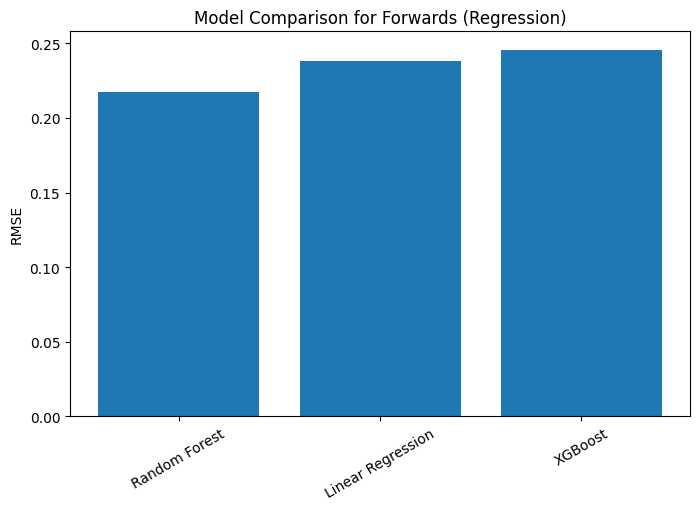

Best model: Random Forest for Midfielders


,Model,RMSE,R²
1,Random Forest,0.175641,0.994183
0,Linear Regression,0.187333,0.993383
2,XGBoost,0.215064,0.991279


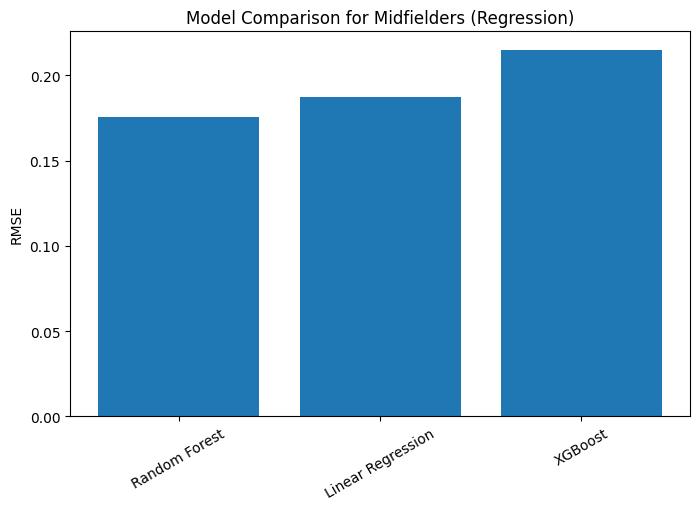

Best model: Random Forest for Defenders


,Model,RMSE,R²
1,Random Forest,0.181468,0.993791
0,Linear Regression,0.187258,0.993388
2,XGBoost,0.213358,0.991417


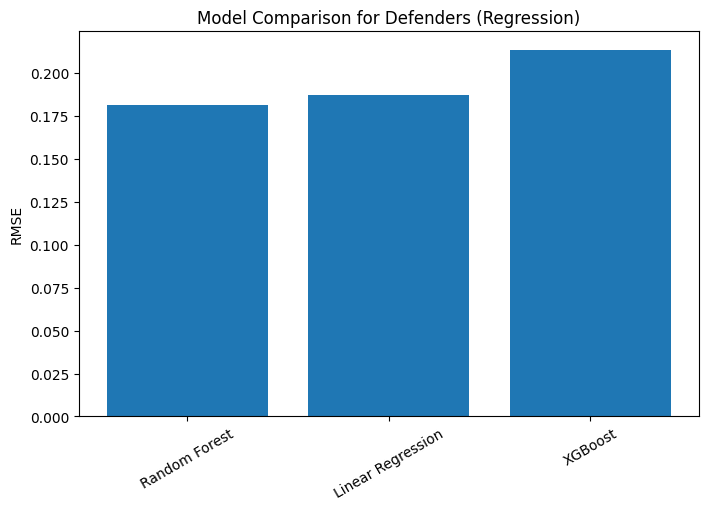

Best model: Random Forest for Goalkeepers


,Model,RMSE,R²
1,Random Forest,0.165498,0.994836
0,Linear Regression,0.173453,0.994327
2,XGBoost,0.205268,0.992055


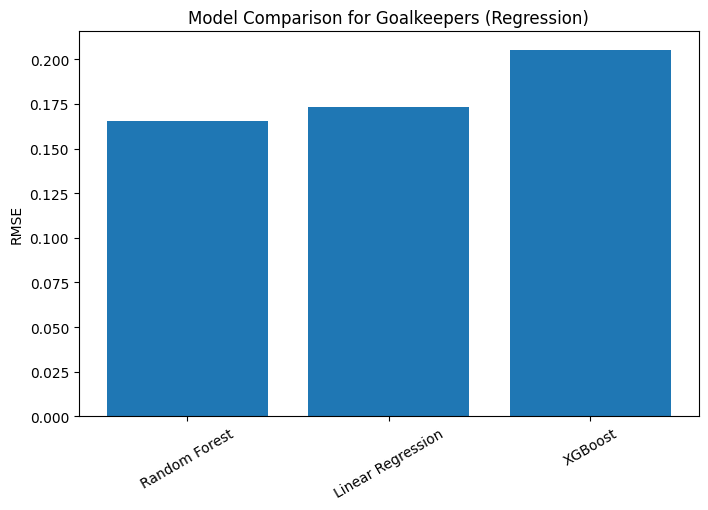

In [27]:
def prepare_data(df, target_col, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_col]).select_dtypes(include=['number'])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

def validate_and_compare(models, X_train, X_test, y_train, y_test, task='regression'):
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if task == 'regression':
            rmse = root_mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results.append({'Model': name, 'RMSE': rmse, 'R²': r2})
        else:
            acc = accuracy_score(y_test, y_pred)
            results.append({'Model': name, 'Accuracy': acc})

    results_df = pd.DataFrame(results)
    metric = 'RMSE' if task == 'regression' else 'Accuracy'
    results_df.sort_values(by=metric, ascending=(task=='regression'), inplace=True)
    best_model_name = results_df.iloc[0]['Model']
    best_model = models[best_model_name]
    
    return results_df, best_model_name, best_model

def get_models(task='regression'):
    if task == 'regression':
        models = {
            "Linear Regression": LinearRegression(),
            "Random Forest": RandomForestRegressor(random_state=42),
            "XGBoost": xgb.XGBRegressor(random_state=42, n_estimators=200)
        }
    elif task == 'classification':
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Random Forest": RandomForestClassifier(random_state=42),
            "XGBoost": xgb.XGBClassifier(random_state=42, n_estimators=200)
        }
    else:
        raise ValueError("task must be 'regression' or 'classification'")
    return models

def plot_results(results_df, position, task='regression'):
    metric = 'RMSE' if task == 'regression' else 'Accuracy'
    plt.figure(figsize=(8, 5))
    plt.bar(results_df['Model'], results_df[metric])
    plt.ylabel(metric)
    plt.title(f'Model Comparison for {position} ({task.title()})')
    plt.xticks(rotation=30)
    plt.show()

position_dfs = [forwards_df, midfielders_df, defenders_df, goalkeepers_df]
positions = ["Forwards", "Midfielders", "Defenders", "Goalkeepers"]
for i in range(4):
    X_train, X_test, y_train, y_test = prepare_data(position_dfs[i], target_col='total_points')

    models = get_models(task='regression')  # or 'classification'
    results_df, best_model_name, best_model = validate_and_compare(
        models, X_train, X_test, y_train, y_test, task='regression'
    )

    print(f"Best model: {best_model_name} for {positions[i]}")
    display(results_df)
    plot_results(results_df, positions[i], task='regression')